In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
import pickle

In [4]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [5]:
train = pd.read_csv('train__bis_full_stack_final.csv', sep=",")
test = pd.read_csv('test__bis_full_stack_final.csv', sep=",")

In [7]:
train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,...,x9_Cleaning staff,x9_Cooking staff,x9_Core staff,x9_Drivers,x9_HR staff,x9_High skill tech staff,x9_IT staff,x9_Laborers,x9_Low-skill Laborers,x9_Managers,x9_Medicine staff,x9_Private service staff,x9_Realty agents,x9_Sales staff,x9_Secretaries,x9_Security staff,x9_Waiters/barmen staff,x10_FRIDAY,x10_MONDAY,x10_SATURDAY,x10_SUNDAY,x10_THURSDAY,x10_TUESDAY,x10_WEDNESDAY,x11_Advertising,x11_Agriculture,x11_Bank,x11_Business Entity Type 1,x11_Business Entity Type 2,x11_Business Entity Type 3,x11_Cleaning,x11_Construction,x11_Culture,x11_Electricity,x11_Emergency,x11_Government,x11_Hotel,x11_Housing,x11_Industry: type 1,x11_Industry: type 10,x11_Industry: type 11,x11_Industry: type 12,x11_Industry: type 13,x11_Industry: type 2,x11_Industry: type 3,x11_Industry: type 4,x11_Industry: type 5,x11_Industry: type 6,x11_Industry: type 7,x11_Industry: type 8,x11_Industry: type 9,x11_Insurance,x11_Kindergarten,x11_Legal Services,x11_Medicine,x11_Military,x11_Mobile,x11_Other,x11_Police,x11_Postal,x11_Realtor,x11_Religion,x11_Restaurant,x11_School,x11_Security,x11_Security Ministries,x11_Self-employed,x11_Services,x11_Telecom,x11_Trade: type 1,x11_Trade: type 2,x11_Trade: type 3,x11_Trade: type 4,x11_Trade: type 5,x11_Trade: type 6,x11_Trade: type 7,x11_Transport: type 1,x11_Transport: type 2,x11_Transport: type 3,x11_Transport: type 4,x11_University,x11_XNA,x12_not specified,x12_org spec account,x12_reg oper account,x12_reg oper spec account,x13_block of flats,x13_specific housing,x13_terraced house,x14_Block,x14_Mixed,x14_Monolithic,x14_Others,x14_Panel,"x14_Stone, brick",x14_Wooden,x15_No,x15_Yes,x16_False,x16_True
0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.964437,0.852140,0.705433,0.098901,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,0.005747,0.058824,0.005814,0.083333,0.735788,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [8]:
test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,...,x9_Cleaning staff,x9_Cooking staff,x9_Core staff,x9_Drivers,x9_HR staff,x9_High skill tech staff,x9_IT staff,x9_Laborers,x9_Low-skill Laborers,x9_Managers,x9_Medicine staff,x9_Private service staff,x9_Realty agents,x9_Sales staff,x9_Secretaries,x9_Security staff,x9_Waiters/barmen staff,x10_FRIDAY,x10_MONDAY,x10_SATURDAY,x10_SUNDAY,x10_THURSDAY,x10_TUESDAY,x10_WEDNESDAY,x11_Advertising,x11_Agriculture,x11_Bank,x11_Business Entity Type 1,x11_Business Entity Type 2,x11_Business Entity Type 3,x11_Cleaning,x11_Construction,x11_Culture,x11_Electricity,x11_Emergency,x11_Government,x11_Hotel,x11_Housing,x11_Industry: type 1,x11_Industry: type 10,x11_Industry: type 11,x11_Industry: type 12,x11_Industry: type 13,x11_Industry: type 2,x11_Industry: type 3,x11_Industry: type 4,x11_Industry: type 5,x11_Industry: type 6,x11_Industry: type 7,x11_Industry: type 8,x11_Industry: type 9,x11_Insurance,x11_Kindergarten,x11_Legal Services,x11_Medicine,x11_Military,x11_Mobile,x11_Other,x11_Police,x11_Postal,x11_Realtor,x11_Religion,x11_Restaurant,x11_School,x11_Security,x11_Security Ministries,x11_Self-employed,x11_Services,x11_Telecom,x11_Trade: type 1,x11_Trade: type 2,x11_Trade: type 3,x11_Trade: type 4,x11_Trade: type 5,x11_Trade: type 6,x11_Trade: type 7,x11_Transport: type 1,x11_Transport: type 2,x11_Transport: type 3,x11_Transport: type 4,x11_University,x11_XNA,x12_not specified,x12_org spec account,x12_reg oper account,x12_reg oper spec account,x13_block of flats,x13_specific housing,x13_terraced house,x14_Block,x14_Mixed,x14_Monolithic,x14_Others,x14_Panel,"x14_Stone, brick",x14_Wooden,x15_No,x15_Yes,x16_False,x16_True
0,0.000000,0.000935,0.130787,0.073886,0.102132,0.257000,0.869975,0.790451,0.887175,0.098901,1.0,1.0,0.0,1.0,0.0,1.0,0.052632,0.5,0.5,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.778428,0.923573,0.177549,0.0660,0.0590,0.9732,0.7552,0.0211,0.00,0.1379,0.1250,0.2083,0.0481,0.0756,0.0505,0.0000,0.0036,0.0672,0.0612,0.9732,0.7648,0.0190,0.0000,0.1379,0.1250,0.2083,0.0458,0.0771,0.0526,0.0000,0.0011,0.0666,0.0590,0.9732,0.7585,0.0208,0.00,0.1379,0.1250,0.2083,0.0487,0.0761,0.0514,0.0000,0.0031,0.0392,0.0,0.0,0.0,0.0,0.594595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [9]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
test.isna().sum()

CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
AMT_CREDIT                                 0
AMT_ANNUITY                                0
AMT_GOODS_PRICE                            0
REGION_POPULATION_RELATIVE                 0
DAYS_EMPLOYED                              0
DAYS_REGISTRATION                          0
DAYS_ID_PUBLISH                            0
OWN_CAR_AGE                                0
FLAG_MOBIL                                 0
FLAG_EMP_PHONE                             0
FLAG_WORK_PHONE                            0
FLAG_CONT_MOBILE                           0
FLAG_PHONE                                 0
FLAG_EMAIL                                 0
CNT_FAM_MEMBERS                            0
REGION_RATING_CLIENT                       0
REGION_RATING_CLIENT_W_CITY                0
HOUR_APPR_PROCESS_START                    0
REG_REGION_NOT_LIVE_REGION                 0
REG_REGION_NOT_WORK_REGION                 0
LIVE_REGIO

In [11]:
train.isna().sum()

CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
AMT_CREDIT                                 0
AMT_ANNUITY                                0
AMT_GOODS_PRICE                            0
REGION_POPULATION_RELATIVE                 0
DAYS_EMPLOYED                              0
DAYS_REGISTRATION                          0
DAYS_ID_PUBLISH                            0
OWN_CAR_AGE                                0
FLAG_MOBIL                                 0
FLAG_EMP_PHONE                             0
FLAG_WORK_PHONE                            0
FLAG_CONT_MOBILE                           0
FLAG_PHONE                                 0
FLAG_EMAIL                                 0
CNT_FAM_MEMBERS                            0
REGION_RATING_CLIENT                       0
REGION_RATING_CLIENT_W_CITY                0
HOUR_APPR_PROCESS_START                    0
REG_REGION_NOT_LIVE_REGION                 0
REG_REGION_NOT_WORK_REGION                 0
LIVE_REGIO

In [12]:
target = train['TARGET'].to_numpy()

In [13]:
X = train.drop(['TARGET'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size =0.20, random_state = 10)

In [12]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((246008, 278), (61503, 278), (246008,), (61503,))

### Création de la méthode d'évaluation des performances de nos modèles

In [18]:
from sklearn.metrics import fbeta_score, make_scorer

In [19]:
scorer = make_scorer(fbeta_score, beta = 2)

## NaiveBayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
train.shape

(307511, 279)

In [17]:
target.shape

(307511,)

In [18]:


clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB()

In [19]:
y_pred = clf.predict(X_test)
predicted_probas=clf.predict_proba(X_test)

In [20]:
from sklearn.metrics import accuracy_score
acc_naive = accuracy_score(y_test, y_pred)

In [21]:

from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 6382, 50156],
       [  325,  4640]], dtype=int64)

In [22]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel() 
TN, FP, FN, TP

(6382, 50156, 325, 4640)

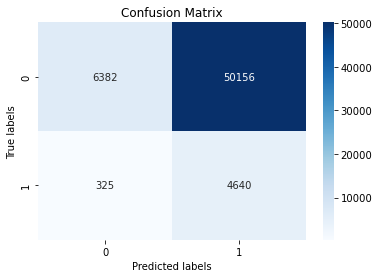

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [24]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_naive = roc_auc_score(y_test, y_pred)

In [25]:
roc_naive

0.5237108127902427

In [39]:
import matplotlib.pyplot as plt
import scikitplot as skplt

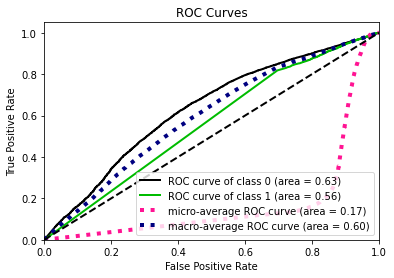

In [27]:
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

In [28]:
Recall = TP/(TP+FN)
Recall
Precision = TP/ (TP+FP)
Precision

0.08467771370173005

In [29]:
print(Recall)
print('---------')
print(Precision)

0.9345417925478349
---------
0.08467771370173005


### Regression Logistique

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [14]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,...,x9_Cleaning staff,x9_Cooking staff,x9_Core staff,x9_Drivers,x9_HR staff,x9_High skill tech staff,x9_IT staff,x9_Laborers,x9_Low-skill Laborers,x9_Managers,x9_Medicine staff,x9_Private service staff,x9_Realty agents,x9_Sales staff,x9_Secretaries,x9_Security staff,x9_Waiters/barmen staff,x10_FRIDAY,x10_MONDAY,x10_SATURDAY,x10_SUNDAY,x10_THURSDAY,x10_TUESDAY,x10_WEDNESDAY,x11_Advertising,x11_Agriculture,x11_Bank,x11_Business Entity Type 1,x11_Business Entity Type 2,x11_Business Entity Type 3,x11_Cleaning,x11_Construction,x11_Culture,x11_Electricity,x11_Emergency,x11_Government,x11_Hotel,x11_Housing,x11_Industry: type 1,x11_Industry: type 10,x11_Industry: type 11,x11_Industry: type 12,x11_Industry: type 13,x11_Industry: type 2,x11_Industry: type 3,x11_Industry: type 4,x11_Industry: type 5,x11_Industry: type 6,x11_Industry: type 7,x11_Industry: type 8,x11_Industry: type 9,x11_Insurance,x11_Kindergarten,x11_Legal Services,x11_Medicine,x11_Military,x11_Mobile,x11_Other,x11_Police,x11_Postal,x11_Realtor,x11_Religion,x11_Restaurant,x11_School,x11_Security,x11_Security Ministries,x11_Self-employed,x11_Services,x11_Telecom,x11_Trade: type 1,x11_Trade: type 2,x11_Trade: type 3,x11_Trade: type 4,x11_Trade: type 5,x11_Trade: type 6,x11_Trade: type 7,x11_Transport: type 1,x11_Transport: type 2,x11_Transport: type 3,x11_Transport: type 4,x11_University,x11_XNA,x12_not specified,x12_org spec account,x12_reg oper account,x12_reg oper spec account,x13_block of flats,x13_specific housing,x13_terraced house,x14_Block,x14_Mixed,x14_Monolithic,x14_Others,x14_Panel,"x14_Stone, brick",x14_Wooden,x15_No,x15_Yes,x16_False,x16_True
0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.964437,0.852140,0.705433,0.098901,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,0.005747,0.058824,0.005814,0.083333,0.735788,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [15]:
target.shape

(307511,)

In [16]:
X.shape

(307511, 278)

In [20]:
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression(class_weight= {0:.1, 1:.9}, solver = 'saga')
logreg_cv=GridSearchCV(model, param_grid = params, scoring= scorer, verbose =3, cv =5)
logreg_cv.fit(X,target)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("F-beta :",logreg_cv.best_score_)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.127 total time=  14.1s
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.129 total time=  13.3s


KeyboardInterrupt: 

In [ ]:
# Récupèration du score r2 à partir de la grille optimale
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_logreg_opti = {key :[value] for key,value in logreg_cv.best_params_.items()}
parameters_logreg_opti

In [ ]:
type(list(parameters_logreg_opti.values())[1])

In [21]:
logreg_opti = LogisticRegression(class_weight= {0:.1, 1:.9}, C =1000, penalty = 'l1', solver = 'saga')

In [22]:
logreg_opti.fit(X, target)

LogisticRegression(C=1000, class_weight={0: 0.1, 1: 0.9}, penalty='l1',
                   solver='saga')

In [23]:
logreg_opti

LogisticRegression(C=1000, class_weight={0: 0.1, 1: 0.9}, penalty='l1',
                   solver='saga')

In [24]:
import pickle

In [25]:
filename2 = 'logreg_opti.pkl'
pickle.dump(logreg_opti, open(filename2, 'wb'))

In [26]:
target_pred = logreg_opti.predict(X)
predicted_probas=logreg_opti.predict_proba(X)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
accuracy_score(target, target_pred)

0.7586460321744588

In [30]:
cnf_matrix=confusion_matrix(target, target_pred)
cnf_matrix

array([[218287,  64399],
       [  9820,  15005]], dtype=int64)

In [31]:
TN, FP, FN, TP = confusion_matrix(target, target_pred).ravel() 
TN, FP, FN, TP

(218287, 64399, 9820, 15005)

In [32]:
Recall = TP/(TP+FN)
Recall
Precision = TP/ (TP+FP)
Precision

0.18897032895068258

In [33]:
print(Recall)
print('---------')
print(Precision)

0.6044310171198388
---------
0.18897032895068258


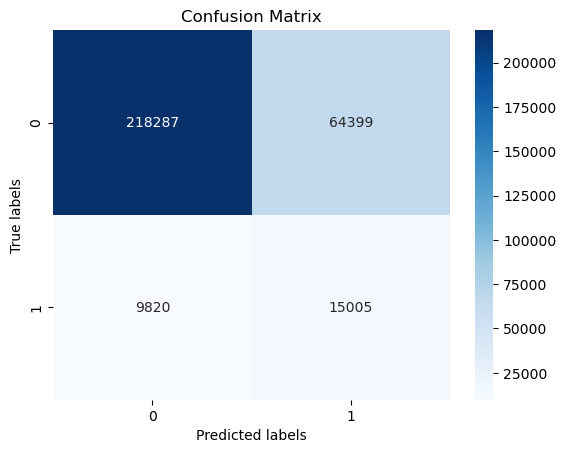

In [34]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_auc_score(target, target_pred)

0.6883099737969669

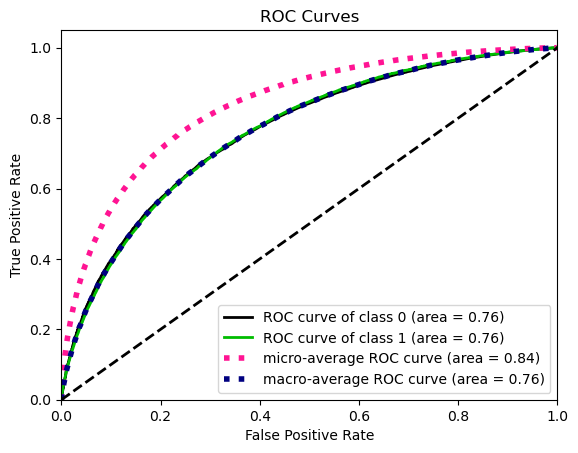

In [40]:
skplt.metrics.plot_roc(target, predicted_probas)
plt.show()

In [ ]:
# Interprétation globale du modèle
import shap
explainer = shap.Explainer(logreg_opti.predict, X)

In [ ]:
shap_values = explainer(X)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfr = RandomForestClassifier(class_weight= {0:.1, 1:.9})

In [32]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [33]:
parameters_rfr = {'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}
   
rfr_search = GridSearchCV(rfr,
                               param_grid = parameters_rfr,
                              verbose=3,
                              scoring = scorer,
                               cv=3)

rfr_search_cv = rfr_search.fit(X, target)

print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_search_cv.best_params_))
print("Le meilleur score est {}".format(rfr_search_cv.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.008 total time=  10.5s
[CV 2/3] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.008 total time=  10.6s
[CV 3/3] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.009 total time=  10.7s
[CV 1/3] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.001 total time=  50.8s
[CV 2/3] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.001 total time=  51.1s
[CV 3/3] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.002 total time=  50.8s
[CV 1/3] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.001 total time= 1.7min
[CV 2/3] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.001 total time= 1.7min
[CV 3/3] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.001 total time= 1.7min
[CV 1/3] END max_features=a

[CV 1/3] END max_features=sqrt, min_samples_leaf=5, n_estimators=300;, score=0.038 total time= 4.7min
[CV 2/3] END max_features=sqrt, min_samples_leaf=5, n_estimators=300;, score=0.039 total time= 4.7min
[CV 3/3] END max_features=sqrt, min_samples_leaf=5, n_estimators=300;, score=0.039 total time= 4.7min
[CV 1/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=10;, score=0.179 total time=   9.5s
[CV 2/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=10;, score=0.176 total time=   9.4s
[CV 3/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=10;, score=0.178 total time=   9.6s
[CV 1/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=50;, score=0.139 total time=  45.2s
[CV 2/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=50;, score=0.137 total time=  45.4s
[CV 3/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=50;, score=0.138 total time=  45.3s
[CV 1/3] END max_features=sqrt, min_samples_leaf=10, n_estimators=100;, score=0.13

In [34]:
import pickle

In [35]:
rfr_opt = RandomForestClassifier(n_estimators =10, max_features = 'auto', min_samples_leaf =10, class_weight= {0:.1, 1:.9})

In [36]:
rfr_opt.fit(X,target)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, min_samples_leaf=10,
                       n_estimators=10)

In [37]:
rfr_opt

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, min_samples_leaf=10,
                       n_estimators=10)

In [51]:
filename = 'RFR_opti.pkl'
pickle.dump(rfr_opt, open(filename, 'wb'))

In [5]:
import pickle
filename = 'RFR_opti.pkl'

In [6]:
pickle.load(open(filename, 'rb'))

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, min_samples_leaf=10,
                       n_estimators=10)

In [41]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_rfr_opti = {key :[value] for key,value in rfr_search_cv.best_params_.items()}
parameters_rfr_opti

{'max_features': ['auto'], 'min_samples_leaf': [10], 'n_estimators': [10]}

In [7]:
rfr_opt = pickle.load(open(filename, 'rb'))

In [12]:
target_pred = rfr_opt.predict(X)
predicted_probas= rfr_opt.predict_proba(X)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(target, target_pred)

0.9596242085648968

In [16]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target, target_pred)
cnf_matrix

array([[275902,   6784],
       [  5632,  19193]], dtype=int64)

In [17]:
TN, FP, FN, TP = confusion_matrix(target, target_pred).ravel() 
TN, FP, FN, TP

(275902, 6784, 5632, 19193)

In [18]:
Recall = TP/(TP+FN)

Precision = TP/ (TP+FP)

In [19]:
print(Recall)
print('------------')
print(Precision)

0.7731319234642497
------------
0.7388459021442045


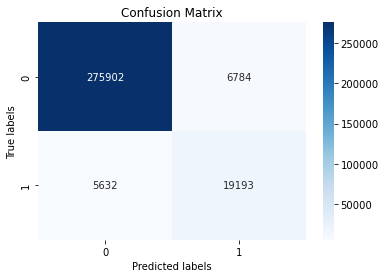

In [47]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [48]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_rfr = roc_auc_score(y_test, y_pred)

In [49]:
roc_rfr

0.5237108127902427

In [6]:
rfr_opt = pickle.load(open('RFR_opti.pkl', 'rb'))

In [7]:
rfr_opt

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, min_samples_leaf=10,
                       n_estimators=10)

## Deuxieme TEST

In [8]:
import shap

In [9]:
explainer_tree_rfr = shap.TreeExplainer(rfr_opt)

In [10]:
explainer_tree_rfr

In [10]:
explainer_tree_rfr_2 = shap.TreeExplainer(rfr_opt, X)

In [62]:
explainer_tree_rfr_2

### SHAPVALUES 2


In [11]:
shap_values = explainer_tree_rfr.shap_values(X)

In [11]:
type(X.loc[[421]])

pandas.core.frame.DataFrame

In [12]:
explainer_tree_rfr.shap_values(X.loc[[421]])

[array([[ 6.05110614e-04,  5.90014173e-03,  5.49452620e-03,
          1.16332625e-02, -9.33965863e-05,  2.98628500e-03,
          8.97124487e-03,  8.01444246e-03,  7.80087311e-03,
          7.29992834e-03,  0.00000000e+00,  1.20505434e-03,
          1.43551721e-03,  5.97758726e-07, -2.20836677e-06,
          7.88320616e-05,  2.08649011e-03,  1.64985362e-03,
          9.25266637e-04,  3.80490764e-03,  4.74229186e-07,
          6.70999108e-06,  5.12650664e-05,  3.45330037e-04,
          4.27823409e-03,  2.68656296e-04, -2.28836235e-03,
         -3.26023191e-02,  1.46578776e-02,  4.91107211e-04,
         -5.08387557e-06,  3.62228903e-04,  2.92770083e-04,
          2.90594619e-04,  5.27640456e-05,  1.18067831e-03,
          1.40178701e-04,  2.23728338e-04, -2.28546273e-04,
          1.51212836e-04, -2.02766447e-03, -7.90184897e-06,
          2.24810762e-04,  1.02589866e-03,  1.24921484e-04,
          2.57259140e-03,  5.44710162e-04,  2.69325078e-04,
         -1.07804286e-04,  8.47615442e-0

In [16]:
rfr_opt.predict(X.loc[[421]])

array([0], dtype=int64)

In [17]:
X.loc[[421]]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,...,x9_Cleaning staff,x9_Cooking staff,x9_Core staff,x9_Drivers,x9_HR staff,x9_High skill tech staff,x9_IT staff,x9_Laborers,x9_Low-skill Laborers,x9_Managers,x9_Medicine staff,x9_Private service staff,x9_Realty agents,x9_Sales staff,x9_Secretaries,x9_Security staff,x9_Waiters/barmen staff,x10_FRIDAY,x10_MONDAY,x10_SATURDAY,x10_SUNDAY,x10_THURSDAY,x10_TUESDAY,x10_WEDNESDAY,x11_Advertising,x11_Agriculture,x11_Bank,x11_Business Entity Type 1,x11_Business Entity Type 2,x11_Business Entity Type 3,x11_Cleaning,x11_Construction,x11_Culture,x11_Electricity,x11_Emergency,x11_Government,x11_Hotel,x11_Housing,x11_Industry: type 1,x11_Industry: type 10,x11_Industry: type 11,x11_Industry: type 12,x11_Industry: type 13,x11_Industry: type 2,x11_Industry: type 3,x11_Industry: type 4,x11_Industry: type 5,x11_Industry: type 6,x11_Industry: type 7,x11_Industry: type 8,x11_Industry: type 9,x11_Insurance,x11_Kindergarten,x11_Legal Services,x11_Medicine,x11_Military,x11_Mobile,x11_Other,x11_Police,x11_Postal,x11_Realtor,x11_Religion,x11_Restaurant,x11_School,x11_Security,x11_Security Ministries,x11_Self-employed,x11_Services,x11_Telecom,x11_Trade: type 1,x11_Trade: type 2,x11_Trade: type 3,x11_Trade: type 4,x11_Trade: type 5,x11_Trade: type 6,x11_Trade: type 7,x11_Transport: type 1,x11_Transport: type 2,x11_Transport: type 3,x11_Transport: type 4,x11_University,x11_XNA,x12_not specified,x12_org spec account,x12_reg oper account,x12_reg oper spec account,x13_block of flats,x13_specific housing,x13_terraced house,x14_Block,x14_Mixed,x14_Monolithic,x14_Others,x14_Panel,"x14_Stone, brick",x14_Wooden,x15_No,x15_Yes,x16_False,x16_True
421,0.0,0.000819,0.146254,0.082555,0.125701,0.22601,0.907995,0.811689,0.995554,0.010989,1.0,0.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.518318,0.401652,0.597163,0.0876,0.0763,0.9816,0.7552,0.0211,0.0,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0,0.0036,0.084,0.0746,0.9816,0.7648,0.019,0.0,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0,0.0011,0.0864,0.0758,0.9816,0.7585,0.0208,0.0,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0,0.0031,0.0688,0.0,0.0,0.0,0.0,0.866729,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [25]:
shap_values = explainer_tree_rfr(X.loc[[421]]) 

In [37]:
type(shap_values[0,:])

shap._explanation.Explanation

In [33]:
explainer_tree_rfr.expected_value

array([0.55900958, 0.44099042])

In [35]:
type(X.iloc[0, :])

pandas.core.series.Series

In [30]:
shap_values[0, :]

.values =
array([[ 6.05110614e-04, -6.05110611e-04],
       [ 5.90014173e-03, -5.90014173e-03],
       [ 5.49452620e-03, -5.49452620e-03],
       [ 1.16332625e-02, -1.16332625e-02],
       [-9.33965863e-05,  9.33965862e-05],
       [ 2.98628500e-03, -2.98628500e-03],
       [ 8.97124487e-03, -8.97124487e-03],
       [ 8.01444246e-03, -8.01444246e-03],
       [ 7.80087311e-03, -7.80087310e-03],
       [ 7.29992834e-03, -7.29992834e-03],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.20505434e-03, -1.20505434e-03],
       [ 1.43551721e-03, -1.43551721e-03],
       [ 5.97758726e-07, -5.97758726e-07],
       [-2.20836677e-06,  2.20836678e-06],
       [ 7.88320616e-05, -7.88320616e-05],
       [ 2.08649011e-03, -2.08649011e-03],
       [ 1.64985362e-03, -1.64985362e-03],
       [ 9.25266637e-04, -9.25266634e-04],
       [ 3.80490764e-03, -3.80490764e-03],
       [ 4.74229186e-07, -4.74229206e-07],
       [ 6.70999108e-06, -6.70999106e-06],
       [ 5.12650664e-05, -5.12650664e-05],
 

In [19]:

shap.force_plot(explainer_tree_rfr.expected_value[0], explainer_tree_rfr.shap_values(X.loc[[421]])[0], X.loc[[421]])

In [7]:
type(X.loc[[421]])

pandas.core.frame.DataFrame

In [85]:
type(shap.force_plot(explainer_tree_rfr.expected_value[0], explainer_tree_rfr.shap_values(X.loc[[421]])[0], X.loc[[421]]))

shap.plots._force.AdditiveForceVisualizer

In [29]:
type(explainer_tree_rfr)

shap.explainers._tree.Tree

In [55]:
explainer_tree_rfr.expected_value,

(array([0.55900958, 0.44099042]),)

In [59]:
shap_values[1]

array([[-5.16613604e-04, -1.53381044e-03,  1.06098353e-02, ...,
         1.23493927e-05,  4.71725202e-03,  2.22091863e-03],
       [-3.21247501e-04, -5.07355084e-03, -5.01323547e-03, ...,
         1.80606693e-06,  1.64887470e-04,  1.90369069e-04],
       [ 2.16466143e-04, -2.81308848e-03, -1.22609877e-02, ...,
         2.31382495e-06,  1.23348305e-03,  5.80590507e-04],
       ...,
       [ 1.09381301e-04, -1.34837464e-03, -1.51930075e-03, ...,
         2.37000269e-06,  1.79353204e-03,  1.63391537e-05],
       [-1.31657185e-04, -3.31270783e-03,  4.32102279e-03, ...,
         2.06002736e-06,  4.10006011e-03,  2.19165037e-03],
       [-5.96868936e-04, -4.57552975e-03,  2.06622079e-03, ...,
         1.21163736e-06,  9.06959154e-04, -9.44891884e-04]])

In [12]:
import pickle

In [13]:
with open('explainer_2', 'wb') as f :
    pickle.dump(explainer_tree_rfr, f)

In [14]:
with open('shap_values_2', 'wb') as f :
    pickle.dump(shap_values, f)

In [30]:
explainer_tree_rfr.expected_value

array([0.55900958, 0.44099042])

In [39]:
shap.initjs()

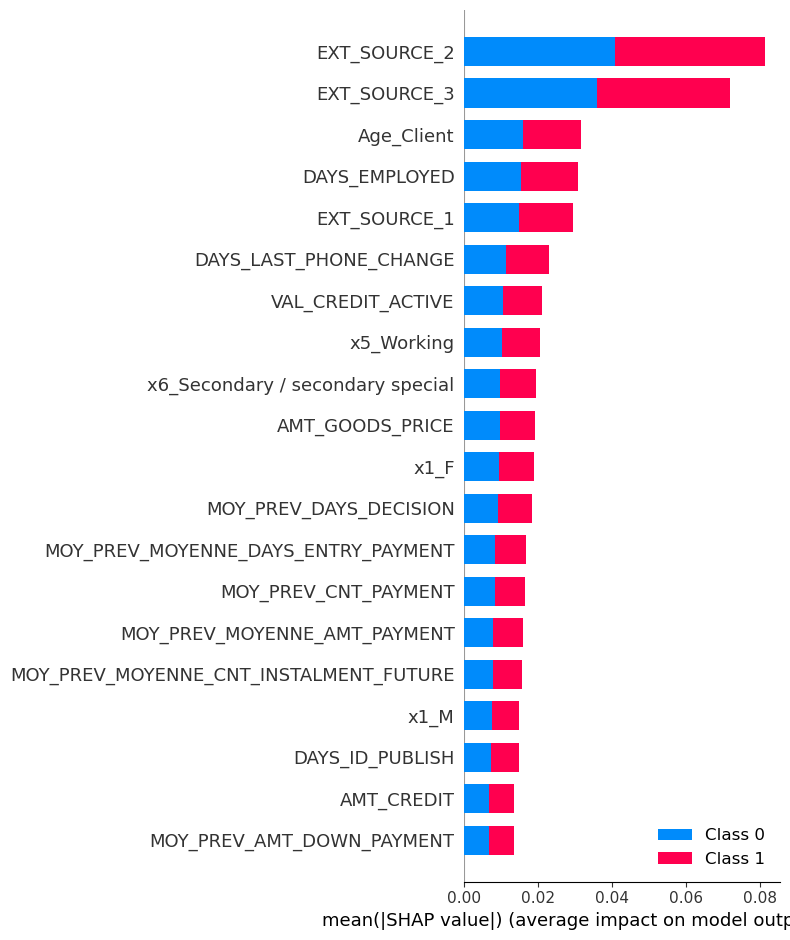

In [44]:
shap.summary_plot(shap_values, X)

In [52]:
# Interprétation globale du modèle
import shap
explainer_rfr = shap.Explainer(rfr_opt.predict, X)

In [53]:
type(explainer_rfr)

shap.explainers._permutation.Permutation

In [12]:
with open('explainer_reel', 'wb') as f :
    pickle.dump(explainer_rfr, f)

In [15]:
type(explainer_rfr)

shap.explainers._permutation.Permutation

In [16]:
type(shap_values_rfr)

shap._explanation.Explanation

In [25]:
type(shap_values)

list

In [74]:
type(explainer_tree_rfr)

shap.explainers._tree.Tree

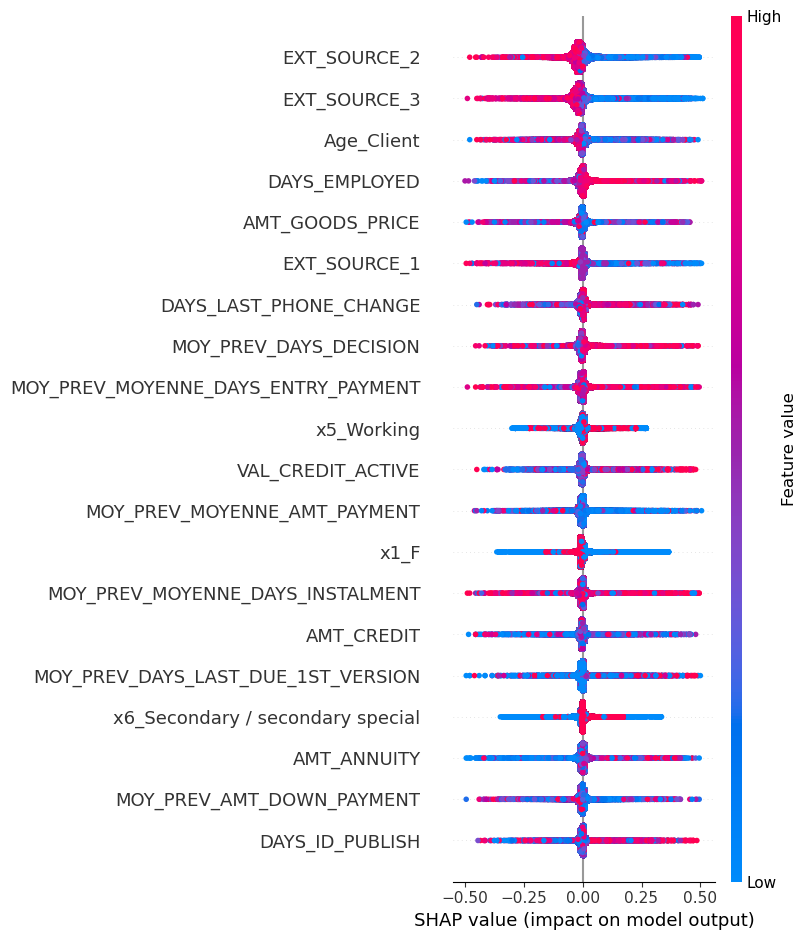

In [24]:
shap.summary_plot(shap_values_rfr)

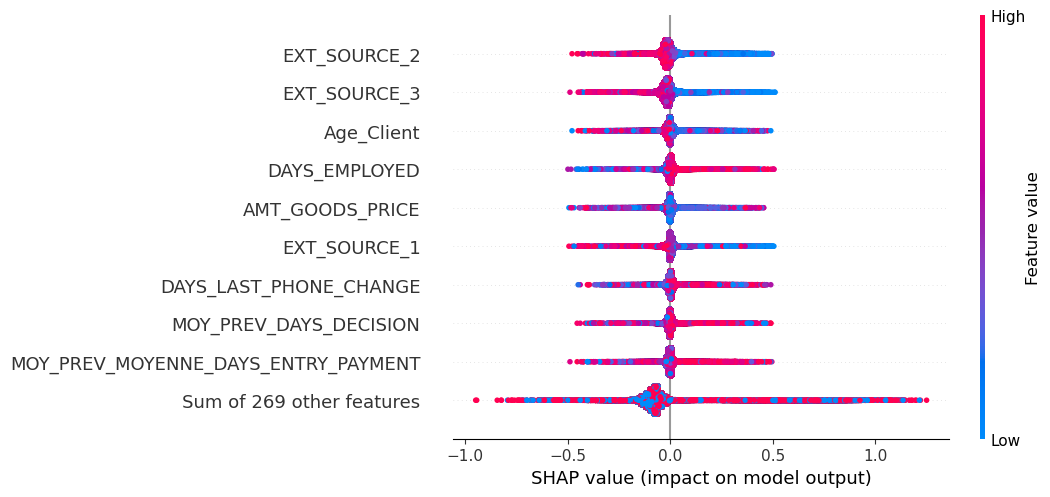

In [25]:
shap.plots.beeswarm(shap_values_rfr)

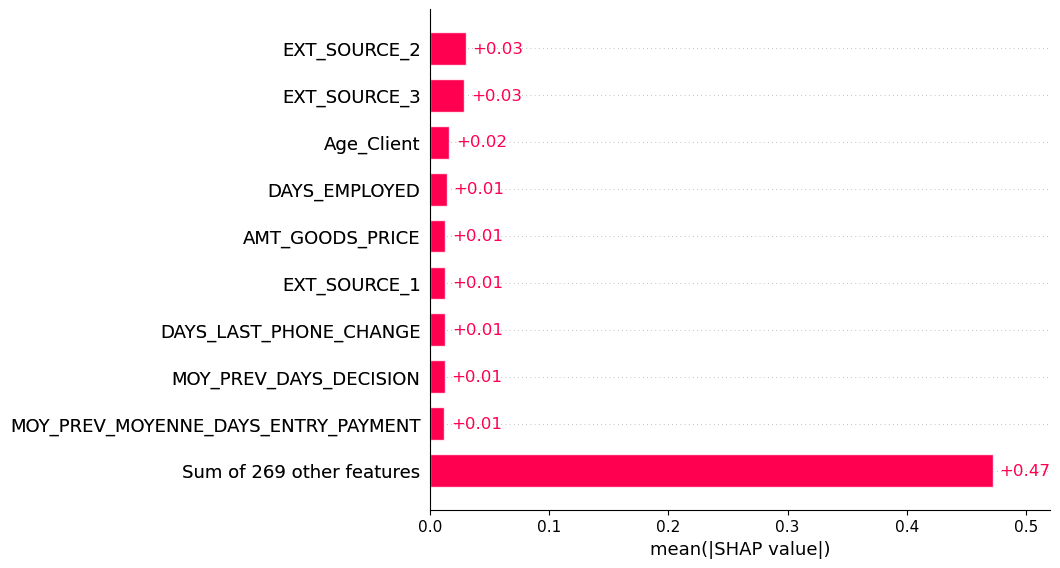

In [23]:
shap.plots.bar(shap_values_rfr)

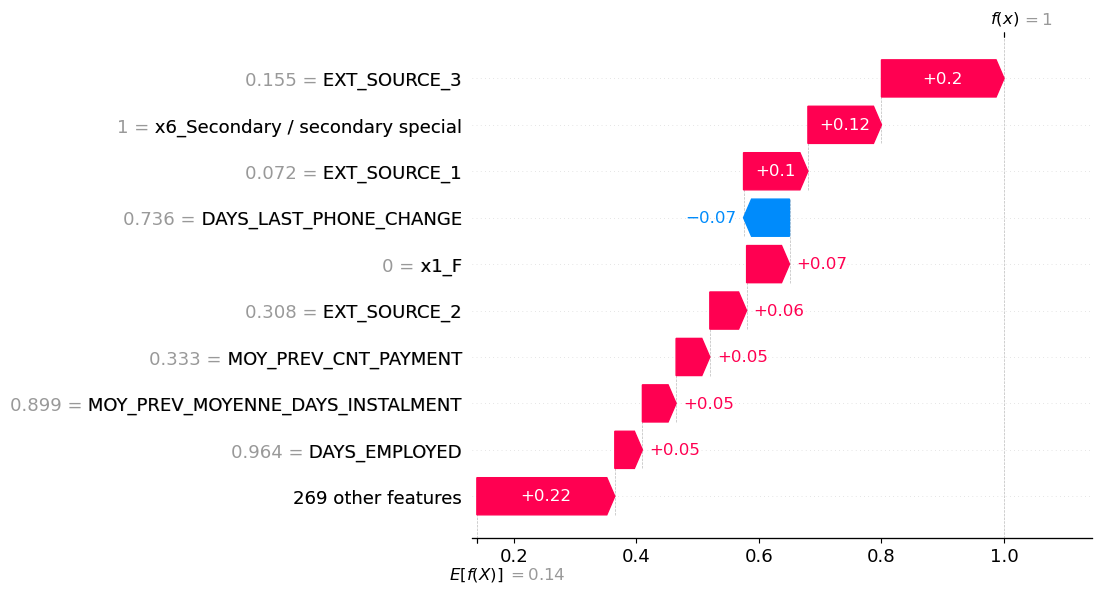

In [21]:
shap.plots.waterfall(shap_values_rfr[0])

In [22]:
shap_values_rfr = explainer_rfr(X)

Permutation explainer: 307512it [12:06:19,  7.06it/s]                              


In [23]:
with open('explainer', 'wb') as f :
    pickle.dump(shap_values_rfr, f)

In [48]:
import pickle
shap_values_rfr = pickle.load(open('explainer','rb'))

In [49]:
type(shap_values_rfr)

shap._explanation.Explanation

In [50]:
type(shap_values)

list

In [70]:
type(explainer_rfr)

shap.explainers._permutation.Permutation

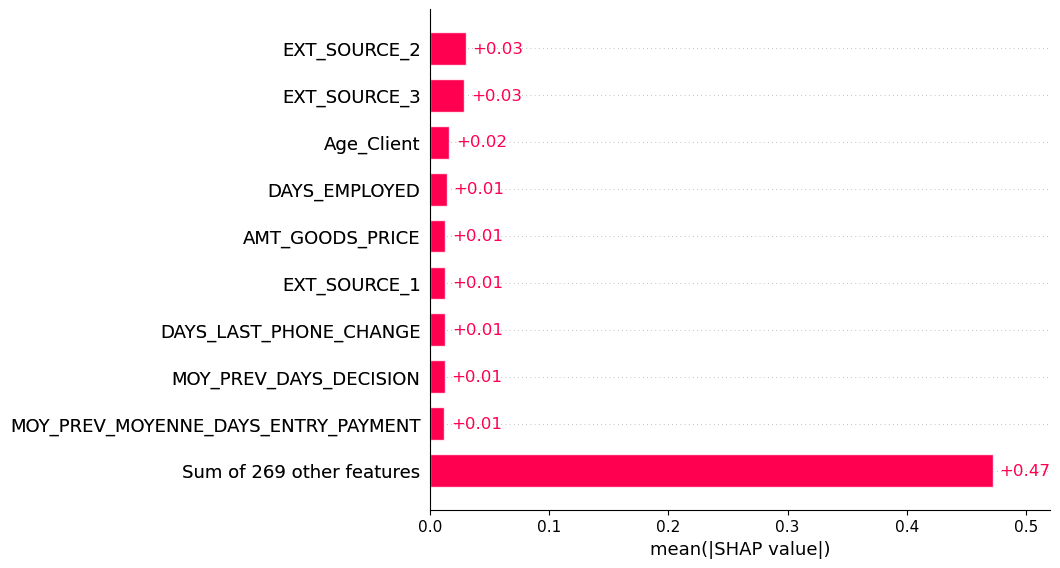

NoneType

In [7]:
type(shap.plots.bar(shap_values_rfr))

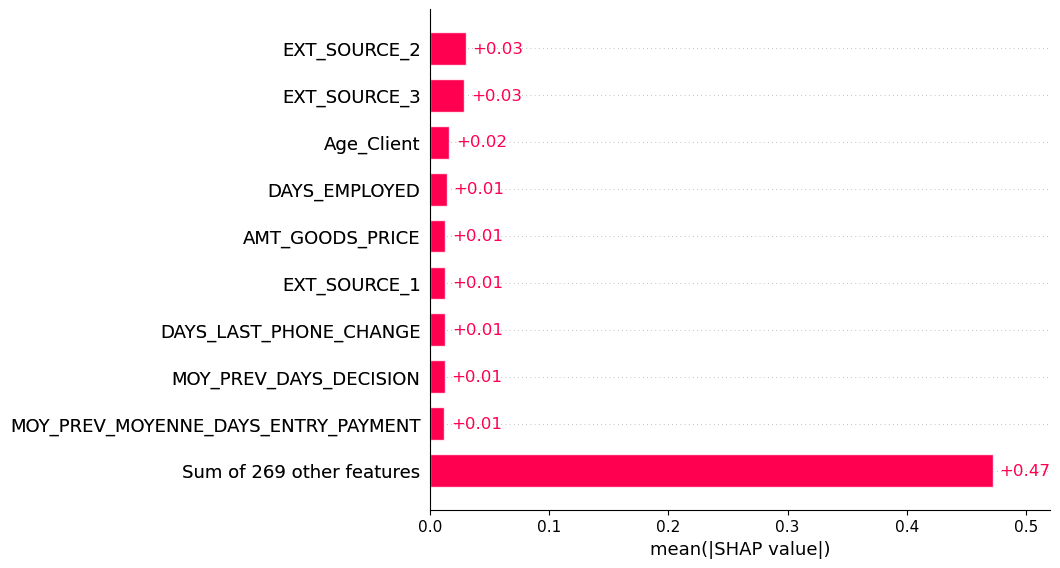

In [5]:
with open('general_plot', 'wb') as f :
    pickle.dump(shap.plots.bar(shap_values_rfr), f)

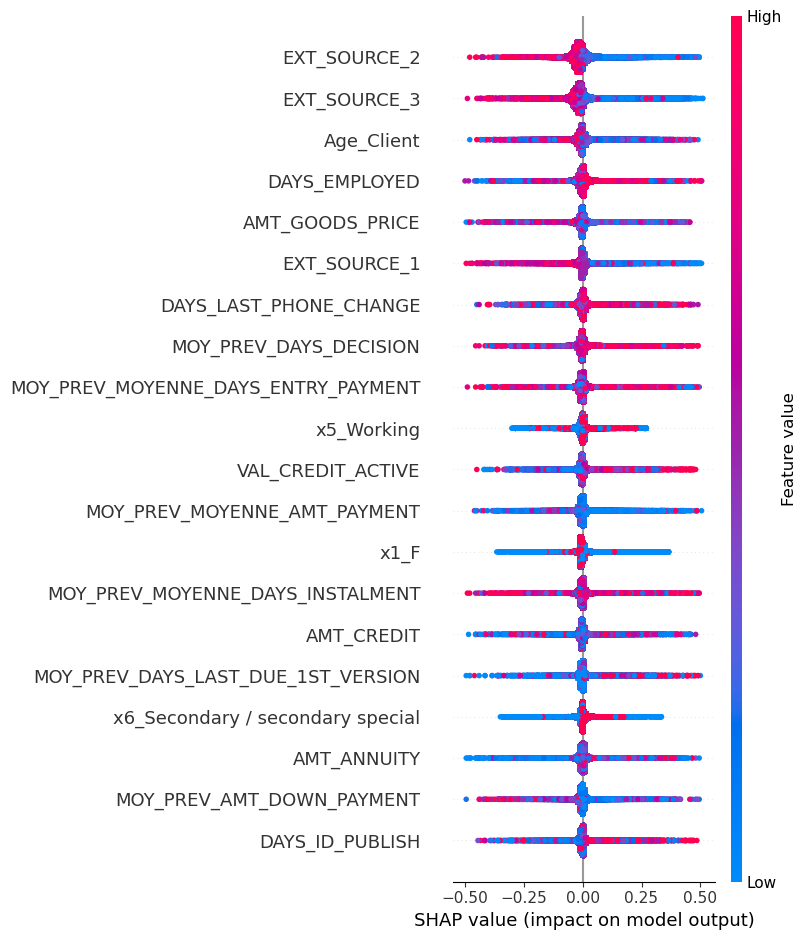

In [68]:
shap.summary_plot(shap_values_rfr)

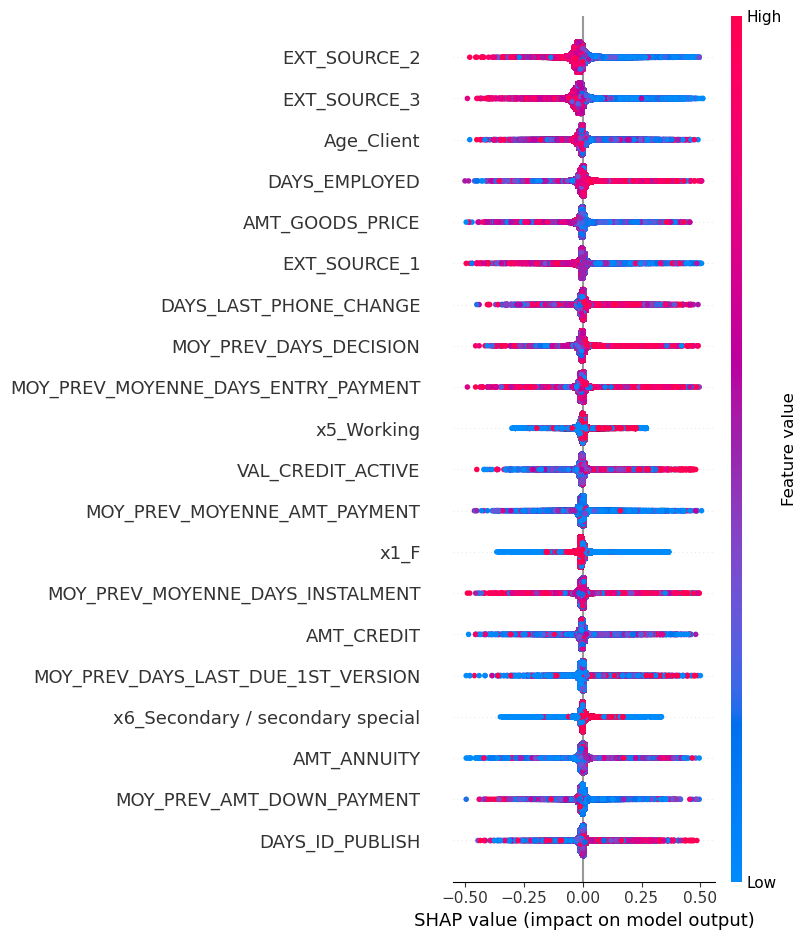

In [8]:
with open('summary_plot', 'wb') as f :
    pickle.dump(shap.summary_plot(shap_values_rfr), f)

In [6]:
general_plot = pickle.load(open('general_plot', 'rb'))

In [8]:
type(general_plot)

NoneType

In [65]:
type(shap_values_rfr)

shap._explanation.Explanation

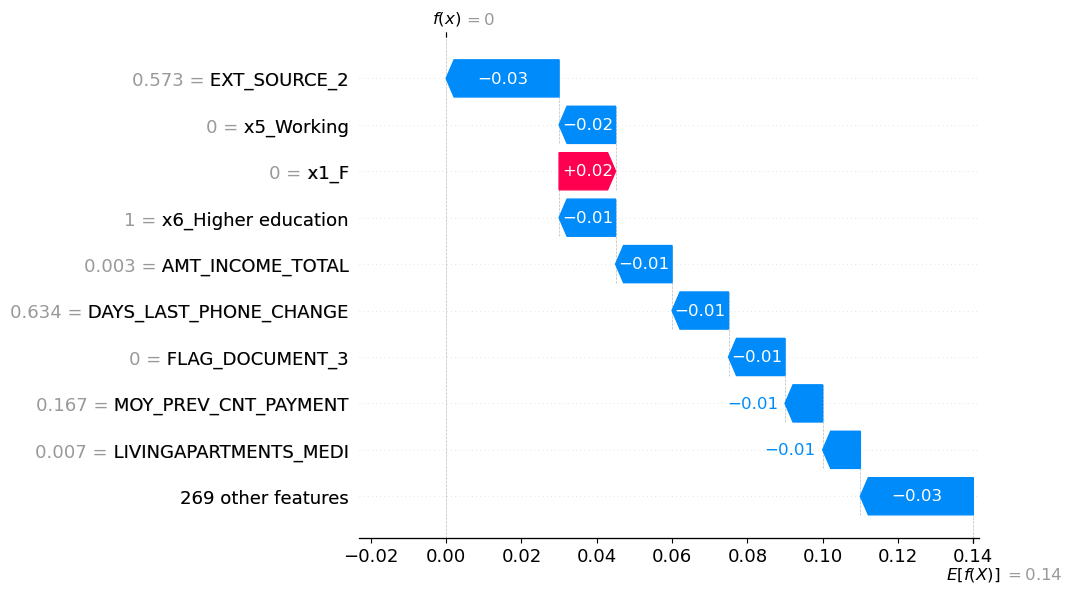

In [69]:
shap.waterfall_plot(shap_values_rfr[2650])